In [ ]:
pip install matplotlib seaborn pandas scipy liac-arff scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import arff
import pandas as pd

with open('data/Melbourne_Airbnb', 'r') as f:
    data = arff.load(f)

df = pd.DataFrame(data['data'], columns=[a[0] for a in data['attributes']])

In [4]:
df.head(2)

,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,...,host_verifications_manual_offline,host_verifications_offline_government_id,host_verifications_selfie,host_verifications_reviews,host_verifications_identity_manual,host_verifications_sesame_offline,host_verifications_weibo,host_verifications_email,host_verifications_sent_id,host_verifications_phone
0,"""https://www.airbnb.com/rooms/25586695""",2.018120e+13,"""12/7/2018""","""Beach side, art deco flat in heart of St Kilda""","""A beautiful art deco flat right in the heart ...","""5 minutes walk to the beach. 1 minute walk t...","""A beautiful art deco flat right in the heart ...",None,None,None,...,False,False,False,True,False,False,False,True,False,True
1,"""https://www.airbnb.com/rooms/1057401""",2.018120e+13,"""12/7/2018""","""Modern Bayside Studio Apartment""","""Self contained modern apartment with its own ...","""We offer a self-contained modern apartment wi...","""Self contained modern apartment with its own ...","""The apartment is in a quiet residential neigh...",None,"""There is street parking available outside at ...",...,False,True,True,True,True,False,False,True,False,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Columns: 103 entries, listing_url to host_verifications_phone
dtypes: float64(18), int64(13), object(72)
memory usage: 14.4+ MB


In [6]:
df.describe(include='all')

,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,...,host_verifications_manual_offline,host_verifications_offline_government_id,host_verifications_selfie,host_verifications_reviews,host_verifications_identity_manual,host_verifications_sesame_offline,host_verifications_weibo,host_verifications_email,host_verifications_sent_id,host_verifications_phone
count,18316,1.831600e+04,18316,18314,17757,13459,18053,11525,9279,11944,...,18316,18316,18316,18316,18316,18316,18316,18316,18316,18316
unique,18316,NaN,2,18013,16693,12506,17441,9799,7382,10239,...,2,2,2,2,2,2,2,2,2,2
top,"""https://www.airbnb.com/rooms/25586695""",NaN,"""12/7/2018""","""Home away from home""","""The ‘Venti’ offers a sense of exclusivity nes...","""#NAME?""","""ELLIA Apartments in Doncaster are available f...","""Melbourne City - voted one of the most liveab...","""Please, note we collect a security deposit of...","""Southern Cross Station (main station/transpor...",...,False,False,False,True,False,False,False,True,False,True
freq,1,NaN,18305,14,16,40,15,52,72,46,...,17946,11298,14407,13848,14616,18256,18164,16972,18311,18180
mean,NaN,2.018120e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.018120e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.018120e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.018120e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.018120e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Understanding
Target Variable : `price_label`

Missing values: 183,821 missing entries across 18,316 instances (so many rows have missing values)

In [8]:
df.shape

(18316, 103)

In [13]:
# Columns with missing values
missing = df.isna().sum()
percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing, '% of Total': percent})
missing_cols = missing_table[missing_table['Missing Values'] > 0].index
missing_table.loc[missing_cols, 'Data Type'] = df[missing_cols].dtypes
missing_table_with_dtype = missing_table[missing_table['Missing Values'] > 0].sort_values('% of Total', ascending=False)
missing_table_with_dtype

,Missing Values,% of Total,Data Type
license,18297,99.896266,object
monthly_price,16810,91.777681,float64
weekly_price,16307,89.031448,float64
notes,9037,49.339375,object
host_about,7309,39.905001,object
neighborhood_overview,6791,37.076873,object
interaction,6665,36.388950,object
transit,6372,34.789255,object
host_neighborhood,6369,34.772876,object
house_rules,6276,34.265123,object


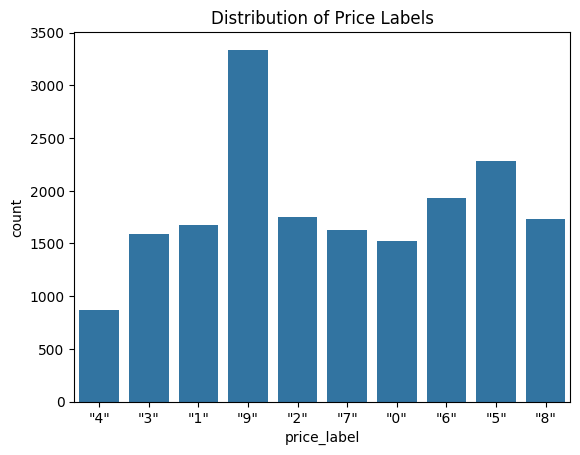

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='price_label', data=df)
plt.title("Distribution of Price Labels")
plt.show()

In [11]:
df.describe()

,scrape_id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,1.831600e+04,1.831600e+04,18316.000000,18316.000000,18316.000000,18305.000000,18311.000000,18288.000000,18316.000000,2009.000000,...,18316.000000,13740.000000,13729.000000,13734.000000,13717.000000,13729.000000,13718.000000,13717.000000,18316.000000,14114.000000
mean,2.018120e+13,7.092650e+07,-37.826674,145.008606,3.429351,1.289265,1.525258,1.989119,147.595272,917.910901,...,21.267089,94.252475,9.639158,9.436144,9.721878,9.753296,9.716504,9.482759,7.222592,1.596866
std,0.000000e+00,6.474866e+07,0.066715,0.127956,2.226041,0.580418,0.946582,1.543607,191.951536,862.171074,...,39.204170,8.533017,0.835213,0.985347,0.763427,0.760964,0.693574,0.886007,15.838113,1.734620
min,2.018120e+13,1.274000e+04,-38.224427,144.484326,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,2.018120e+13,1.747060e+07,-37.852675,144.957684,2.000000,1.000000,1.000000,1.000000,71.000000,450.000000,...,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.300000
50%,2.018120e+13,4.801411e+07,-37.817852,144.978367,2.000000,1.000000,1.000000,1.000000,111.000000,750.000000,...,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000
75%,2.018120e+13,1.142029e+08,-37.803172,145.012981,4.000000,1.500000,2.000000,2.000000,165.000000,1071.000000,...,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.300000
max,2.018120e+13,2.294705e+08,-37.482595,145.831408,16.000000,14.000000,16.000000,24.000000,12501.000000,11536.000000,...,538.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,98.000000,13.770000


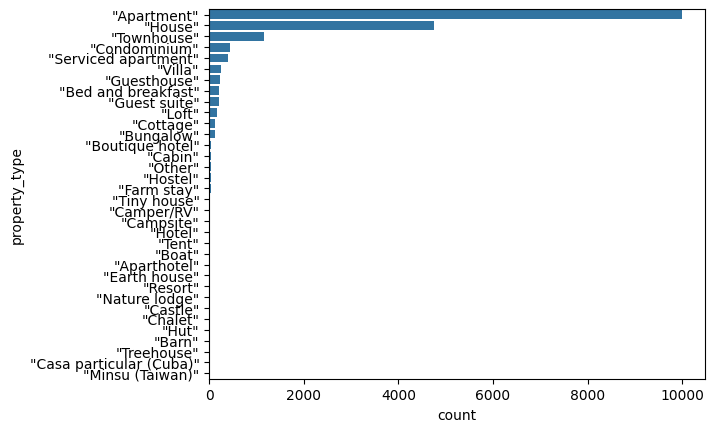

In [17]:
sns.countplot(y='property_type', data=df, order=df['property_type'].value_counts().index)
plt.show()

#### Now we will try to separate numeric, categorical and text columns for ease of further analysis

In [4]:
text_cols = []
categorical_cols = []

for col in df.select_dtypes(include='object').columns:
    n_unique = df[col].nunique()
    n_total = len(df[col])
    
    # If almost all values are unique, treat as text
    if n_unique / n_total > 0.95:  # 95% unique threshold
        text_cols.append(col)
    else:
        categorical_cols.append(col)

numeric_cols = df.select_dtypes(include='number').columns

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))
print("Text columns:", len(text_cols))

Numeric columns: 31
Categorical columns: 67
Text columns: 5


--------------------------------------------------------------------------------------

# Random Forest Classifier

In [6]:
# Ensure 'price_label' is not dropped or encoded
target_col = 'price_label'
safe_text_cols = [col for col in text_cols if col != target_col]
safe_categorical_cols = [col for col in categorical_cols if col != target_col]

# Drop text columns except target
df_model = df.drop(columns=safe_text_cols)

# One-hot encode categorical columns except target
df_model = pd.get_dummies(df_model, columns=safe_categorical_cols, dummy_na=True)

# Fill missing values (simple strategy: fill with median for numeric)
for col in df_model.select_dtypes(include='number').columns:
    df_model[col] = df_model[col].fillna(df_model[col].median())

# Fill remaining missing values (if any) with a placeholder
df_model = df_model.fillna('missing')

# Separate features and target
X = df_model.drop(columns=[target_col])
y = df_model[target_col]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(20))  # top 20 features

price                          0.048979
accommodates                   0.011723
room_type_"Entire home/apt"    0.011596
beds                           0.009407
bedrooms                       0.009327
cleaning_fee                   0.009087
longitude                      0.008844
latitude                       0.008564
room_type_"Private room"       0.008084
availability_365               0.007433
bathrooms                      0.007013
host_id                        0.006923
reviews_per_month              0.006891
availability_90                0.006755
number_of_reviews              0.006747
availability_60                0.006676
security_deposit               0.006347
availability_30                0.006309
guests_included                0.005995
extra_people                   0.005700
dtype: float64


--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [15]:
# Import additional libraries for advanced analysis
from scipy.stats import chi2_contingency, pearsonr
from scipy import stats
import re
from collections import Counter

print("="*60)
print("ADVANCED EDA - IMPLEMENTING NEXT STEPS")
print("="*60)

# 1. CORRELATION ANALYSIS BETWEEN NUMERIC VARIABLES AND TARGET
print("\n" + "="*50)
print("1. CORRELATION ANALYSIS - NUMERIC VARIABLES vs TARGET")
print("="*50)

# Get numeric columns and remove target if it's numeric
numeric_cols = column_analysis['numeric']
correlation_results = []

print("📊 CORRELATION WITH PRICE_LABEL:")
for col in numeric_cols:
    # Remove rows where either column has missing values for correlation
    clean_data = df[[col, 'price_label']].dropna()
    
    if len(clean_data) > 10:  # Need sufficient data for correlation
        corr_coef, p_value = pearsonr(clean_data[col], clean_data['price_label'])
        correlation_results.append({
            'Feature': col,
            'Correlation': corr_coef,
            'P_Value': p_value,
            'Sample_Size': len(clean_data),
            'Significance': 'Significant' if p_value < 0.05 else 'Not Significant'
        })

# Convert to DataFrame and sort by absolute correlation
corr_df = pd.DataFrame(correlation_results)
if not corr_df.empty:
    corr_df['Abs_Correlation'] = abs(corr_df['Correlation'])
    corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)
    
    print(f"\nTOP 10 CORRELATIONS WITH PRICE_LABEL:")
    for idx, row in corr_df.head(10).iterrows():
        significance = "✅" if row['Significance'] == 'Significant' else "❌"
        print(f"   • {row['Feature']:<25} | Corr: {row['Correlation']:>6.3f} | p-val: {row['P_Value']:>8.4f} | {significance}")

    # Visualize top correlations
    plt.figure(figsize=(12, 6))
    top_corr = corr_df.head(15)
    colors = ['red' if x < 0 else 'blue' for x in top_corr['Correlation']]
    plt.barh(range(len(top_corr)), top_corr['Correlation'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_corr)), top_corr['Feature'])
    plt.xlabel('Correlation Coefficient')
    plt.title('Top 15 Correlations with Price Label')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

ADVANCED EDA - IMPLEMENTING NEXT STEPS

1. CORRELATION ANALYSIS - NUMERIC VARIABLES vs TARGET
📊 CORRELATION WITH PRICE_LABEL:


AttributeError: 'numpy.dtypes.ObjectDType' object has no attribute 'dtype'